In [1]:
from matplotlib import pyplot as plt 
import os 
import scipy
import numpy as np
import pandas as pd
import IPython
import tensorflow as tf
import keras 
import seaborn as sns
import warnings as w
import sklearn.metrics as Metric_tools
from sklearn.model_selection import train_test_split
import cv2

%load_ext autoreload
%autoreload 2

np.random.seed(1)
w.filterwarnings('ignore')

In [2]:
main = r"E:\机器学习\digit-recognizer"
print("Files  : \n\t {} ".format(os.listdir(main)))

Files  : 
	 ['sample_submission.csv', 'test.csv', 'test.zip', 'train.csv', 'train.zip'] 


In [3]:
train_file = pd.read_csv(os.path.join(main, "train.csv"))
test_file  = pd.read_csv(os.path.join(main, "test.csv"))

In [4]:
print("Training file : ")
train_file.head(20).iloc[:,:17]

Training file : 


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print("Testing file : ")
test_file.head(20).iloc[:,:17]

Testing file : 


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
disc_train = train_file.describe().T
disc_train.iloc[1:20, :]

,count,mean,std,min,25%,50%,75%,max
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel5,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel6,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel7,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel8,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel9,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
disc_test = test_file.describe().T
disc_test.iloc[:20, :]

,count,mean,std,min,25%,50%,75%,max
pixel0,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel1,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel2,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel3,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel4,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel5,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel6,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel7,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel8,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel9,28000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


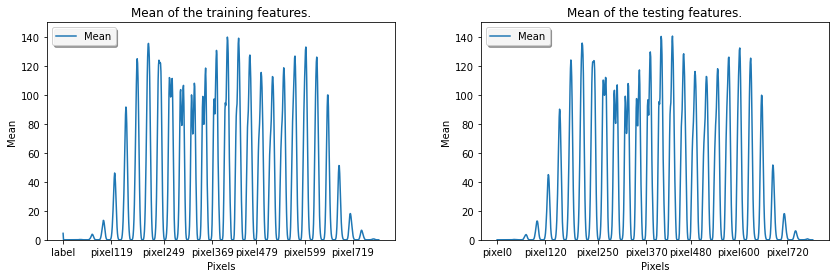

In [8]:
fig, ax_arr = plt.subplots(1, 2, figsize=(14, 4))
fig.subplots_adjust(wspace=0.25, hspace=0.025)

ax_arr = ax_arr.ravel()

sets = iter([(disc_train, "training"), (disc_test, "testing")])
for i, ax in enumerate(ax_arr):
    set_ = next(sets)
    ax.plot(set_[0].loc[:, "mean"], label="Mean")
    ax.set_title("Mean of the {} features.".format(set_[1]))
    ax.set_xlabel('Pixels')
    ax.set_ylabel('Mean')
    ax.set_xticks([0, 120, 250, 370, 480, 600, 720])
    ax.legend(loc="upper left", shadow=True, frameon=True, framealpha=0.9)
    ax.set_ylim([0, 150])
plt.show()

In [9]:
train_file_norm = train_file.iloc[:, 1:] / 255.0
test_file_norm = test_file / 255.0

In [10]:
disc_train = train_file_norm.describe().T
disc_test = test_file_norm.describe().T

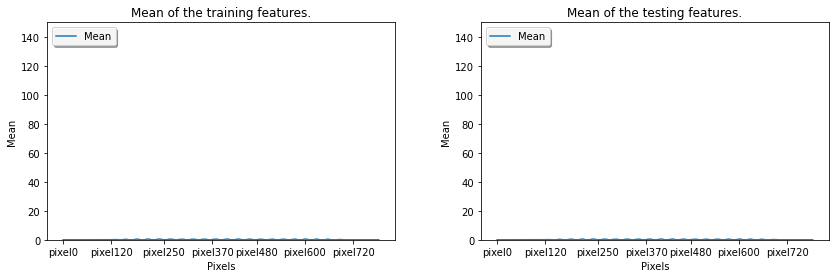

In [11]:
fig, ax_arr = plt.subplots(1, 2, figsize=(14, 4))
fig.subplots_adjust(wspace=0.25, hspace=0.025)

ax_arr = ax_arr.ravel()

sets = iter([(disc_train, "training"), (disc_test, "testing")])
for i, ax in enumerate(ax_arr):
    set_ = next(sets)
    ax.plot(set_[0].loc[:, "mean"], label="Mean")
    ax.set_title("Mean of the {} features.".format(set_[1]))
    ax.set_xlabel('Pixels')
    ax.set_ylabel('Mean')
    ax.set_xticks([0, 120, 250, 370, 480, 600, 720])
    ax.legend(loc="upper left", shadow=True, frameon=True, framealpha=0.9)
    ax.set_ylim([0, 150])
plt.show()


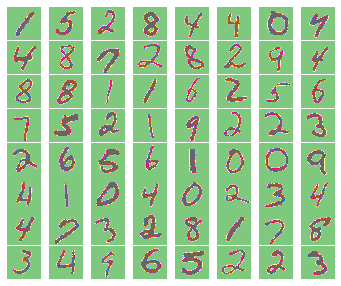

In [12]:
rand_indices = np.random.choice(train_file_norm.shape[0], 128, replace=False)
examples = train_file_norm.iloc[rand_indices, :]

fig, ax_arr = plt.subplots(8, 8, figsize=(6, 5))
fig.subplots_adjust(wspace=.025, hspace=.025)

ax_arr = ax_arr.ravel()
for i, ax in enumerate(ax_arr):
    ax.imshow(examples.iloc[i, :].values.reshape(28, 28), cmap="Accent")
    ax.axis("off")
    
plt.show()    

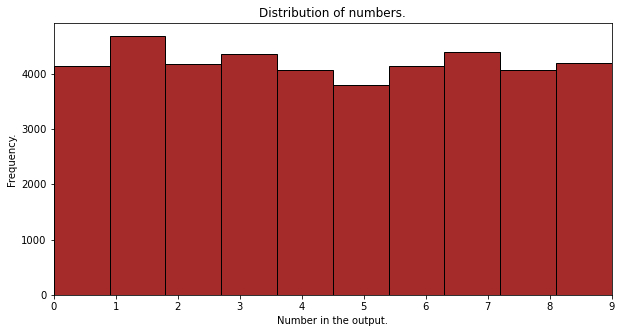

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(train_file.iloc[:, 0], bins=10, edgecolor="black", facecolor="brown")
plt.xlabel('Number in the output.')
plt.ylabel('Frequency.')
plt.title('Distribution of numbers.')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlim([0, 9])
pass

In [14]:
num_examples_train = train_file.shape[0]
num_examples_test = test_file.shape[0]
n_h = 32
n_w = 32
n_c = 3

In [15]:
Train_input_images = np.zeros((num_examples_train, n_h, n_w, n_c))
Test_input_images = np.zeros((num_examples_test, n_h, n_w, n_c))

In [16]:
for example in range(num_examples_train):
    Train_input_images[example,:28,:28,0] = train_file.iloc[example, 1:].values.reshape(28,28)
    Train_input_images[example,:28,:28,1] = train_file.iloc[example, 1:].values.reshape(28,28)
    Train_input_images[example,:28,:28,2] = train_file.iloc[example, 1:].values.reshape(28,28)
    
for example in range(num_examples_test):
    Test_input_images[example,:28,:28,0] = test_file.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,1] = test_file.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,2] = test_file.iloc[example, :].values.reshape(28,28)

In [17]:
for example in range(num_examples_train):
    Train_input_images[example] = cv2.resize(Train_input_images[example], (n_h, n_w))
    
for example in range(num_examples_test):
    Test_input_images[example] = cv2.resize(Test_input_images[example], (n_h, n_w))

In [18]:
Train_labels = np.array(train_file.iloc[:, 0])

In [19]:
print("Shape of train input images : ", Train_input_images.shape)
print("Shape of test input images : ", Test_input_images.shape)
print("Shape of train labels : ", Train_labels.shape)

Shape of train input images :  (42000, 32, 32, 3)
Shape of test input images :  (28000, 32, 32, 3)
Shape of train labels :  (42000,)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=27,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=False)

validation_datagen = ImageDataGenerator()

In [21]:
pretrained_model = keras.applications.resnet50.ResNet50(input_shape=(n_h, n_w, n_c),
                                                        include_top=False, weights='imagenet')

model = keras.Sequential([
    pretrained_model,
    keras.layers.Flatten(),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 60)                122940    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 23,711,262
Trainable params: 23,658,142
Non-trainable params: 53,120
_________________________________________________________________


In [23]:
Optimizer = 'RMSprop'

model.compile(optimizer=Optimizer, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [24]:
train_images, dev_images, train_labels, dev_labels = train_test_split(Train_input_images, 
                                                                      Train_labels,
                                                                      test_size=0.1, train_size=0.9,
                                                                      shuffle=True,
                                                                      random_state=44)
test_images = Test_input_images

In [25]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999999):
            print("Stop training!")
            self.model.stop_training = True

In [26]:
callbacks = myCallback()

In [27]:
EPOCHS = 5
batch_size = 212

history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size=batch_size),
                         steps_per_epoch=train_images.shape[0] / batch_size, 
                         epochs=EPOCHS,   
                         validation_data=validation_datagen.flow(dev_images,dev_labels,
                                                                 batch_size=batch_size),
                         validation_steps=dev_images.shape[0] / batch_size,
                         callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
179/178 [==============================] - 1312s 7s/step - loss: 0.5198 - accuracy: 0.8658 - val_loss: 131.0055 - val_accuracy: 0.3407
Epoch 2/5
179/178 [==============================] - 1441s 8s/step - loss: 0.2053 - accuracy: 0.9496 - val_loss: 5.7972 - val_accuracy: 0.7033
Epoch 3/5
179/178 [==============================] - 1419s 8s/step - loss: 0.1678 - accuracy: 0.9601 - val_loss: 20.5457 - val_accuracy: 0.7662
Epoch 4/5
179/178 [==============================] - 1315s 7s/step - loss: 0.1467 - accuracy: 0.9629 - val_loss: 1.6763 - val_accuracy: 0.8714
Epoch 5/5
179/178 [==============================] - 1318s 7s/step - loss: 0.1347 - accuracy: 0.9685 - val_loss: 1.7232 - val_accuracy: 0.9167


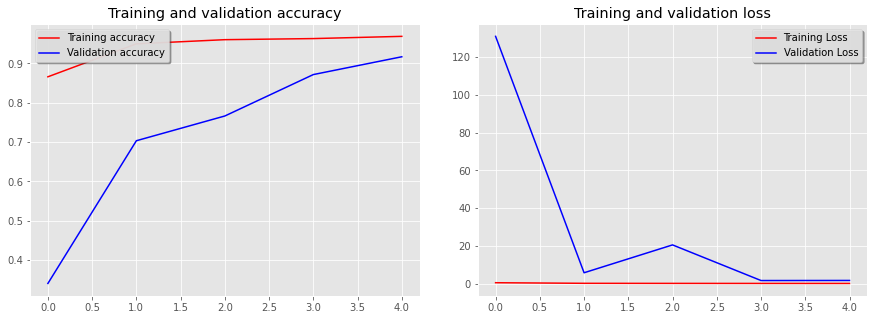

In [28]:
plt.style.use('ggplot')  
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.025)
ax = ax.ravel()

ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc="upper left", shadow=True, frameon=True, fancybox=True, framealpha=0.9)

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend(loc="upper right", shadow=True, frameon=True, fancybox=True, framealpha=0.9)

plt.show()

In [29]:
submission = pd.read_csv('E:/机器学习/submission.csv')
submission.to_csv('my_submission.csv', index=False)